## Movie Recommendation Analysis

#### Loading the Datasets

In [1]:
import pandas as pd
movies = pd.read_csv('movies.csv')
ratings = pd.read_csv('ratings.csv')

#### Inspecting Data

In [2]:
#Inspect first few rows of the dataset
print(movies.head())
print(ratings.head())

   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  
   userId  movieId  rating  timestamp
0       1       17     4.0  944249077
1       1       25     1.0  944250228
2       1       29     2.0  943230976
3       1       30     5.0  944249077
4       1       32     5.0  943228858


In [3]:
#Get an overview of data types and null values
print(movies.info())
print(ratings.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87585 entries, 0 to 87584
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  87585 non-null  int64 
 1   title    87585 non-null  object
 2   genres   87585 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.0+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32000204 entries, 0 to 32000203
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 976.6 MB
None


In [4]:
#Check for duplicated rows
print(f"Duplicate rows in movies: {movies.duplicated().sum()}") 
print(f"Duplicated rows in ratings: {ratings.duplicated().sum()}")

Duplicate rows in movies: 0
Duplicated rows in ratings: 0


In [5]:
#Shape before changes
print(f"Movies dataset size before removing duplicates: {movies.shape}")
print(f"Ratings dataset size before removing duplicates: {ratings.shape}")

Movies dataset size before removing duplicates: (87585, 3)
Ratings dataset size before removing duplicates: (32000204, 4)


#### Data Cleaning

Checking for missing values

In [6]:
#Check for null values
print(movies.isnull().sum())
print(ratings.isnull().sum())

movieId    0
title      0
genres     0
dtype: int64
userId       0
movieId      0
rating       0
timestamp    0
dtype: int64


In [7]:
#Drop rows with null values
movies.dropna(inplace=True)
ratings.dropna(inplace=True)

Remove Duplicates

In [8]:
movies.drop_duplicates(inplace=True)
ratings.drop_duplicates(inplace=True)

#Veryfying changes
print(f"Movies dataset size after removing duplicates: {movies.shape}")
print(f"Ratings dataset size after removing duplicates: {ratings.shape}")

Movies dataset size after removing duplicates: (87585, 3)
Ratings dataset size after removing duplicates: (32000204, 4)


Summary of Cleaned Data

In [9]:
print(movies.info())
print(ratings.info())
print(f"Number of unique movies: {movies['movieId'].nunique()}")
print(f"Number of unique users: {ratings['userId'].nunique()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87585 entries, 0 to 87584
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  87585 non-null  int64 
 1   title    87585 non-null  object
 2   genres   87585 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.0+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32000204 entries, 0 to 32000203
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 976.6 MB
None
Number of unique movies: 87585
Number of unique users: 200948


### Exploratory Data Analysis

Distribution of Ratings

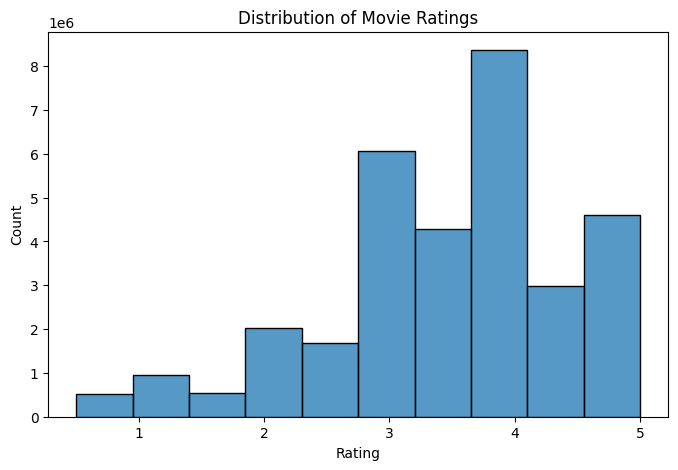

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

#Plot distribution of ratings
plt.figure(figsize=(8,5)) #Set figure size (width, height)
sns.histplot(ratings['rating'], bins=10, kde=False) #Creates histogram of ratings
plt.title('Distribution of Movie Ratings') #Title
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

Most Rated Movies

In [11]:
# Count ratings for each movie
rating_counts = ratings.groupby('movieId')['rating'].count().sort_values(ascending=False) 

# Display top 10 most-rated movies
top_rated_movies = movies[movies['movieId'].isin(rating_counts.head(10).index)]
print(top_rated_movies[['movieId', 'title']])


      movieId                                              title
257       260          Star Wars: Episode IV - A New Hope (1977)
292       296                                Pulp Fiction (1994)
314       318                   Shawshank Redemption, The (1994)
351       356                                Forrest Gump (1994)
475       480                               Jurassic Park (1993)
522       527                            Schindler's List (1993)
585       593                   Silence of the Lambs, The (1991)
2480     2571                                 Matrix, The (1999)
2867     2959                                  Fight Club (1999)
4888     4993  Lord of the Rings: The Fellowship of the Ring,...


Average Ratings

In [12]:
# Calculate average rating
average_ratings = ratings.groupby('movieId')['rating'].mean()

# Combine average ratings with movie titles
movie_avg_ratings = movies.set_index('movieId').join(average_ratings.rename('average_rating'))
print(movie_avg_ratings[['title', 'average_rating']].sort_values(by='average_rating', ascending=False).head(10))


                                     title  average_rating
movieId                                                   
282081                      Shadows (2023)             5.0
282073                   Mal de Ojo (2022)             5.0
282021      Mr. Krueger's Christmas (1980)             5.0
282019        It's a Wonderful Life (2007)             5.0
193529              Traces of Smoke (1992)             5.0
193557            Love Pret-a-porte (2017)             5.0
194066   The Revolution That Wasn't (2008)             5.0
193727                Still Burning (2016)             5.0
281956                      ManFish (2022)             5.0
281902           Going Varsity In Mariachi             5.0


Ratings by Genre

In [13]:
# Explode genres into individual rows
movies_exploded = movies.explode('genres')

# Merge with ratings and calculate average ratings by genre
genre_ratings = pd.merge(ratings, movies_exploded, on='movieId')
average_genre_ratings = genre_ratings.groupby('genres')['rating'].mean().sort_values(ascending=False)
print(average_genre_ratings)


genres
Adventure|Children|Comedy|Romance                 5.00
Adventure|Animation|Documentary|Fantasy           5.00
Adventure|Drama|Romance|War|Western               5.00
Adventure|Drama|Fantasy|Horror|Thriller           5.00
Children|Comedy|Documentary                       5.00
                                                  ... 
Drama|Fantasy|Horror|Romance|Sci-Fi|Thriller      0.75
Action|Comedy|Horror|Romance                      0.50
Action|Adventure|Drama|Horror|Mystery|Thriller    0.50
Adventure|Fantasy|Horror|Mystery|Thriller         0.50
Action|Adventure|Comedy|Horror|Sci-Fi             0.50
Name: rating, Length: 1783, dtype: float64


### Recommendation System

Popularity-Based Recommendation

In [14]:
# Set a threshold for the minimum number of ratings
min_ratings = 50

# Filter movies with enough ratings
popular_movies = ratings.groupby('movieId').filter(lambda x: len(x) >= min_ratings)

# Calculate average ratings for these movies
popular_movies_avg = popular_movies.groupby('movieId')['rating'].mean()

# Combine with movie titles
popular_movies_df = movies.set_index('movieId').join(popular_movies_avg.rename('average_rating'))
recommended_movies = popular_movies_df.sort_values(by='average_rating', ascending=False).head(10)

print(recommended_movies[['title', 'average_rating']])


                                    title  average_rating
movieId                                                  
171011             Planet Earth II (2016)        4.446830
159817                Planet Earth (2006)        4.444369
170705            Band of Brothers (2001)        4.426539
318      Shawshank Redemption, The (1994)        4.404614
171495                             Cosmos        4.330081
858                 Godfather, The (1972)        4.317030
202439                    Parasite (2019)        4.312254
179135              Blue Planet II (2017)        4.300086
198185                  Twin Peaks (1989)        4.298684
220528            Twelve Angry Men (1954)        4.286192


Genre-Based Recommendation

In [15]:
# Choose a genre
genre = 'Action'

# Filter movies by genre
action_movies = movies[movies['genres'].apply(lambda x: genre in x)]

# Merge with average ratings
action_movies_ratings = action_movies.set_index('movieId').join(average_ratings.rename('average_rating'))

# Recommend top-rated action movies
recommended_action_movies = action_movies_ratings.sort_values(by='average_rating', ascending=False).head(10)

print(recommended_action_movies[['title', 'average_rating']])


                                                     title  average_rating
movieId                                                                   
291300                                     Decision (2011)             5.0
278764                                     Theevram (2012)             5.0
276711                 The Great Warrior Skanderbeg (1953)             5.0
170855                                   Bus Driver (2016)             5.0
277624                                       Payoff (1991)             5.0
162734                              Sole Proprietor (2016)             5.0
272463   Princess Principal Crown Handler: Chapter 2 (2...             5.0
186535                          The Brooklyn Banker (2016)             5.0
275667                   Revue Starlight: The Movie (2021)             5.0
169820                               To Be the Best (1993)             5.0


Visualizing the results

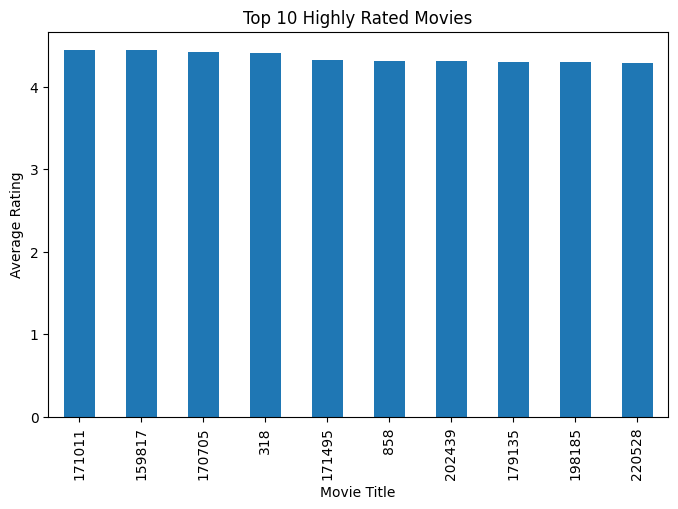

In [16]:
# Plot the top-rated movies
plt.figure(figsize=(8, 5))
recommended_movies['average_rating'].plot(kind='bar')
plt.title('Top 10 Highly Rated Movies')
plt.xlabel('Movie Title')
plt.ylabel('Average Rating')
plt.show()

#### Author
Ujaan Banerjee